# Comparing Top 6 teams from each of Top 5 leagues


Football, most followed sport in the world is dominated by European Leagues. These leagues are known for financial status,acquiring top talents, fierce rivalries and  nail biting endings.

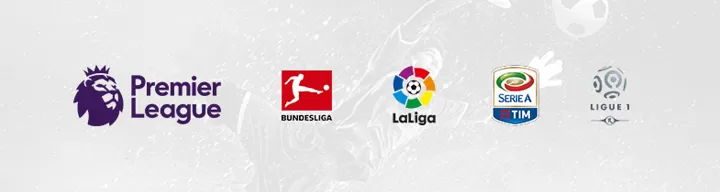

Top six teams of season 2019-20 from each of Premier League **(England)**, Laliga **(Spain)**, Bundesliga **(Germany)**, Ligue 1 **(France)**, Serie A **(Italy)** are chosen to carry out analysis to find out what each league is known for. 
* **Premier League :** Liverpool, Manchester City, Manchester United, Chelsea, Tottenham Hotspurs, Leicester City.
* **La Liga:** Real Madrid, FC Barcelona, Atletico Madrid, Sevilla FC, Real Sociedad, Villareal
* **Bundesliga:** FC Bayern Munchen, Dortmund, RB Leipzig, Mochengladbach, Bayer Leverkusen, Hoffeheim
* **Ligue 1:** Paris Saint-Germain, Marseille, Rennes, Lille, Nice, Reims
* **Serie A:** Juventus, Inter, Atalanta, Lazio,Roma, Milan

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/fifa-21-complete-player-dataset/fifa21_male2.csv")


Analysis is carried out for the First team Squad and not for whole squad.
First team squad is chosen as follows:

* 'GK': 1 
* 'CB': 2
*  'LB'/ 'LWB': 1
*  'RB'/ 'RWB': 1
*  'LW': 2
*  'RW': 2
*  'ST'/ 'CF': 2
*  'LM'/ 'RM'/ 'CAM'/ 'CM'/ 'CDM': 5

Note that the tactical changes are made in midfield or attack, that's why back ups are chosen for these positions only and not in defence.

In [ ]:
positions = [[["GK"],1],[["CB"],2],[["LB","LWB"],1],[["RB","RWB"],1],[["LW"],2],[["RW"],2],[["ST","CF"],2],[["LM","RM","CAM","CM","CDM"],5]]


In [ ]:
def club(club):
    #df_a = pd.DataFrame()
    array = []
    dfPor = df[df["Club"] == club]
    for dictionary in positions:
        df_x = dfPor[dfPor.BP.isin(dictionary[0])]
        df_x = df_x.sort_values(by = ["OVA"],ascending = False).iloc[0:dictionary[1],:]
        array.append(df_x)

    return(pd.concat(array))

In [ ]:
def superstars(x):
    if x >= 87:
        return 1
    else:
        return 0
    
def youngsters(x):
    if x <= 22:
        return 1
    else:
        return 0
df["Superstars"] = df.OVA.apply(superstars)
df["Potential Superstars"] = df.POT.apply(superstars)

In [ ]:
def cleaning(x):
    try:
        x = x.replace("€","")
        x = x.replace("K","000")
        if (("." and "M") in x):
            x = x.replace("M","")
            x = float(x) * 1000000
        else:
            x = x.replace("M","000000")
        return int(x)
    except:
        return x
df.Wage = df.Wage.apply(cleaning)
df.Value = df.Value.apply(cleaning)


In [ ]:
#england spain germany france italy
#liv manc manu che
#real #bar #atm #sev
#bay #dor #leipzig #mochengladbach
#psg #marseille #rennes #lille
#juventus inter atalanta lazio
clubs = [["Liverpool","England"],["Manchester City","England"],["Manchester United","England"],["Chelsea","England"],
         ["Leicester City","England"],["Tottenham Hotspur","England"],
         ["Real Madrid","Spain"],["FC Barcelona","Spain"],["Atlético Madrid","Spain"],["Sevilla FC","Spain"],
         ["Villarreal CF","Spain"],["Real Sociedad","Spain"],
        ["FC Bayern München","Germany"],["Borussia Dortmund","Germany"],["RB Leipzig","Germany"],["Borussia Mönchengladbach","Germany"],
         ["Bayer 04 Leverkusen","Germany"],["TSG 1899 Hoffenheim","Germany"],
        ["Paris Saint-Germain","France"],["Olympique de Marseille","France"],["Stade Rennais FC","France"],["LOSC Lille","France"],
         ["OGC Nice","France"],["Stade de Reims","France"],
        ["Juventus","Italy"],["Inter","Italy"],["Atalanta","Italy"],["Lazio","Italy"],
        ["Roma","Italy"],["Milan","Italy"]]
a = []
for country in clubs:
    a.append([country[0] , np.mean(club(country[0]).OVA),country[1],np.sum(club(country[0]).Wage),np.sum(club(country[0]).Value),np.mean(club(country[0]).Age)])
country = pd.DataFrame(a).rename(columns = {0:"Club",1:"Average OVA",2:"Country",3:"WageFirstTeam",4:"ValueFirstTeam",5:"AgeFirstTeam"}).sort_values(by = "Average OVA",ascending = False).reset_index()
country[["Club","Average OVA","Country","WageFirstTeam","ValueFirstTeam","AgeFirstTeam"]]

In [ ]:
budget = df.groupby("Club").agg({"Wage":"mean","OVA":"mean","Age":"mean","Superstars":"sum","Potential Superstars":"sum","POT":"mean","Value":"sum"})
budget["Wage per rating"] = budget["Wage"]/budget["OVA"]
budget = budget.sort_values(by = "Wage per rating",ascending = False).reset_index()
teams = budget.merge(country,how = "inner",left_on = "Club",right_on = "Club")
teams

Scatterplot below having Wages at X-axis, Overall rating of First Team on Y-axis helps us find out how club are doing with respect to input and output. Wages can be considered as input or efforts put in by the clubs and Average Overall rating can be considered as output.*(Whatever the club gets from the given wages)* 
Size represents the value of the squad and color represents the average age of squad.


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,12))
plt.style.use("seaborn")
plt.scatter(teams["WageFirstTeam"],teams["Average OVA"],s = teams["Value"]/200000,c = teams["AgeFirstTeam"],cmap = "coolwarm")
plt.xlabel("Wages in Euros")
plt.ylabel("Average OVA (First Team)")
plt.colorbar().set_label("Average Age of team")
#plt.plot([72,82], [72,82])
for i in range(len(teams)):
    plt.annotate(teams.iloc[i,0],(teams.WageFirstTeam[i]-50000,teams["Average OVA"][i]),color = "black")

#plt.figure()
from math import pi

u=2250000     #x-position of the center
v = 84.75    #y-position of the center
a=1500000    #radius on the x-axis
b=1.2    #radius on the y-axis
#plt.annotate("Tier 1",(2250000+1600000,84.75))
plt.annotate("Tier 1",(u+a*1.05,v),color = "red")



t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
#plt.grid(color='lightgray',linestyle='--')


u=1000000     #x-position of the center
v = 82.25    #y-position of the center
a=880000    #radius on the x-axis
b=1.65    #radius on the y-axis
plt.annotate("Tier 2",(u+a*1.05,v),color = "red")
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
#plt.grid(color='lightgray',linestyle='--')


u=800000     #x-position of the center
v = 79.6    #y-position of the center
a=520000    #radius on the x-axis
b=1.20    #radius on the y-axis
plt.annotate("Tier 3",(u+a*1.05,v),color = "red")
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

u=360000     #x-position of the center
v = 76.6    #y-position of the center
a=275000    #radius on the x-axis
b=2.20    #radius on the y-axis
plt.annotate("Tier 4",(u+a*1.05,v),color = "red")
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

plt.title("Average Overall Rating of First Team vs Wages")
plt.show()



Based upon the Average Overall Rating teams can be classified in 4 tiers. 
*  **Tier 1:** Liverpool, Manchester City, Real Madrid, FC Barcelona, FC Bayern Munchen, Paris Saint Germain,Atletico Madrid and Juventus

> England: 2  
> Spain: 3  
> France: 1  
> Germany: 1  
> Italy: 1 


* **Tier 2:** Chelsea, Manchester United, Dortmund, Inter Milan, Tottenham Hotspur, Sevilla FC
> England: 3  
> Spain: 1  
> France: 0  
> Germany: 1  
> Italy: 1



* **Tier 3:** Lazio,Leicester City, Real Sociedad, Villareal, Bayer Leverkusen, AC Milan, Mochengladbach, RB Leipzig
> England: 1  
> Spain: 2  
> France: 0  
> Germany: 3  
> Italy: 2

* **Tier 4 :** Roma, Lille, Hoffenheim, Marseille, Rennais, Nice, Reims
> England: 0  
> Spain: 0  
> France: 5   
> Germany: 1  
> Italy: 1   

**Real Madrid** and **FC Barcelona** are spending the highest upon the **wages** trying their best to beat each other *(Greatest Rivalry)*. Wheras **Liverpool** has the highest rated First Team Squad followed by **Manchester City**.
**Atletico Madrid** manages a seat in Tier 1 spending the **least amount of money** among Tier 1 clubs. *(Simione still has magic left in him)*.
**Manchester United, Tottenham Hotspur and Inter** are the most **disappointed** clubs as they are spending equal amount as many Tier 1 clubs but they find themselves stuck in Tier 2. Howevever they do show the **intent** to join Tier 1 unlike Sevilla FC,who spends even less than Tier 3 clubs.
**Sevilla** manages a squad with equal rating as **Manchester United** but they get the job done spending less than **half the money** compared to Manchester United.
**Juventus** and **Roma** has the **oldest squad** having team average age of 30 years. **Manchester United** and **RB Leipzig** have the **youngest** squad. **Chelsea** is most likely to jump to Tier 1 as they have relatively young squad with high team value *(Hope Lampard does justice to their active participation in transfer window)*. **PSG** is the only team from **France** not belonging to Tier 4. (*Farmer's league,huh?*)

Note that value of the squad depends upon Overall rating and averge age. Lower the average age higher the value as seen in case of Sevilla and Manchester United *(Both clubs have same OVA but Manchester United has younger squad and thus valued highly)*.

In [ ]:


plt.figure(figsize = (20,6))
spain = teams[teams["Country"] == "Spain"]["OVA"]
england = teams[teams["Country"] == "England"]["OVA"]
france = teams[teams["Country"] == "France"]["OVA"]
germany = teams[teams["Country"] == "Germany"]["OVA"]
italy = teams[teams["Country"] == "Italy"]["OVA"]
data_a = [spain,england,france,germany,italy]

ticks = ["Spain","England","France","Germany","Italy"]

plt.subplot(121)


bpl = plt.boxplot(data_a,labels = ticks)
plt.title("Average Overall Rating across countries (Present)")
plt.annotate("PSG",xytext = (3,78),color = "blue",xy = (3,77),arrowprops=dict(color = "blue",lw=0.001))
plt.annotate("Bayern",xytext = (4,80),color = "blue",xy = (4,81.4),arrowprops=dict(color = "blue",lw=0.001))
plt.ylabel("Rating")

spain = teams[teams["Country"] == "Spain"]["POT"]
england = teams[teams["Country"] == "England"]["POT"]
france = teams[teams["Country"] == "France"]["POT"]
germany = teams[teams["Country"] == "Germany"]["POT"]
italy = teams[teams["Country"] == "Italy"]["POT"]
data_b = [spain,england,france,germany,italy]

plt.subplot(122)
bpr = plt.boxplot(data_b,labels = ticks)
plt.title("Average Potential Ratings across countries (Expected in Future)")
plt.ylabel("Rating")




plt.show()

Above shown boxplots depects that leagues in **France** and **Germany** are clearly dominated by single team as **PSG** and **Bayern** have their OVA well above the third quartile of their counterparts *(Farmer's league again?)*. Difference between 1st and 6th team is least in case of **England** implying Premier League to be **most competitive** among all. As seen in POTENTIAL, five teams excluding Leicester City will be the potential contender for the title owing to decrease in gap between 1st and 5th.Unlike Series A (Italy), La liga (Spain) have uniform distribution of teams towards both sides of the median value. But the gap tends to increase in future in Spanish league. Reason for this is the aggressive appproach of **Barcelona** and **Real Madrid** to bolster the squad. As of today, Italian league doesn't have much difference between 1st and 6th team but **Juventus** has the potential to **dominate** the Italian league in future.

In [ ]:
plt.figure(figsize = (20,6))
spain = teams[teams["Country"] == "Spain"]["Wage"]
england = teams[teams["Country"] == "England"]["Wage"]
france = teams[teams["Country"] == "France"]["Wage"]
germany = teams[teams["Country"] == "Germany"]["Wage"]
italy = teams[teams["Country"] == "Italy"]["Wage"]
array = [spain,england,france,germany,italy]


plt.subplot(121)
plt.boxplot(array,labels = ["Spain","England","France","Germany","Italy"])
plt.title("Wage distribution across countries")
plt.ylabel("Wages in Euros")


spain = teams[teams["Country"] == "Spain"]["Value"]
england = teams[teams["Country"] == "England"]["Value"]
france = teams[teams["Country"] == "France"]["Value"]
germany = teams[teams["Country"] == "Germany"]["Value"]
italy = teams[teams["Country"] == "Italy"]["Value"]
array = [spain,england,france,germany,italy]

plt.subplot(122)
plt.boxplot(array,labels = ["Spain","England","France","Germany","Italy"])
plt.title("Distribution of team value across countries")
plt.ylabel("Team Value in Euros")

plt.show()

Highest difference among wages is seen in **Laliga** (Spain) and least in **Premier League** (England). France and Germany are dominated by single clubs in case of wages and value as well. **England** has highest median wage and median value followed by **Spain**.
Mean wages and value are almost same for **Bundesliga** (Germany) and **Serie A** (Italy).

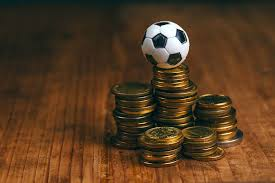

In [ ]:
plt.figure(figsize = (20,6))
spain = teams[teams["Country"] == "Spain"]["Superstars"]
england = teams[teams["Country"] == "England"]["Superstars"]
france = teams[teams["Country"] == "France"]["Superstars"]
germany = teams[teams["Country"] == "Germany"]["Superstars"]
italy = teams[teams["Country"] == "Italy"]["Superstars"]
array = [spain,england,france,germany,italy]

plt.subplot(121)
plt.boxplot(array,labels = ["Spain","England","France","Germany","Italy"])
plt.title("Superstars across countries")
plt.ylabel("Superstars")

spain = teams[teams["Country"] == "Spain"]["Potential Superstars"]
england = teams[teams["Country"] == "England"]["Potential Superstars"]
france = teams[teams["Country"] == "France"]["Potential Superstars"]
germany = teams[teams["Country"] == "Germany"]["Potential Superstars"]
italy = teams[teams["Country"] == "Italy"]["Potential Superstars"]
array = [spain,england,france,germany,italy]

plt.subplot(122)
plt.boxplot(array,labels = ["Spain","England","France","Germany","Italy"])
plt.title("Potential Superstars across countries")
plt.ylabel("Superstars")

plt.show()

**Superstars** are defined as the players having **rating equal to or above 87**. PSG is the only club from **France** to have superstar. However other French club has players expected to be superstars in future. **England** has highest number of Superstar and Potential Superstar.

In [ ]:
plt.figure()
spain = teams[teams["Country"] == "Spain"]["Age"]
england = teams[teams["Country"] == "England"]["Age"]
france = teams[teams["Country"] == "France"]["Age"]
germany = teams[teams["Country"] == "Germany"]["Age"]
italy = teams[teams["Country"] == "Italy"]["Age"]
array = [spain,england,france,germany,italy]

plt.boxplot(array,labels = ["Spain","England","France","Germany","Italy"])
plt.title("Age distribution across countries")
plt.ylabel("Age in years")
plt.show()

**Italy** has the highest average age and **France** has the lowest. Spain, England and Germany has average age around 25 years which is considered as the golden age for a Football player. This implies that generally players spend their **peak years** in Spanish, English or German leagues and move on to Italy once they have passed their peak *(Vidal,Padelli,etc)*. French league produces young players.*(Likes of Benzema, Hazard, Mbappe, Camavinga have spent their tender years in French league)*